In [2]:
import logistic_opt111 as opt111, numpy as np, matplotlib.pyplot as plt, sklearn as sk, pandas as pd

note to self

Per @460, the logistic regression functions in opt111 output α first then the x's. In lecture12_separable_svm, we set up the A matrix such that the result would be given with the x's first and the α at the end.

## 1. Logistic Regression vs. Other Methods

In [404]:
#a

np.random.seed(123454321)
U = np.matrix(np.random.normal(-1.0, 1.0, (20,2)))
V = np.matrix(np.random.normal(1.0, 1.0, (20,2)))
U_sample = np.matrix(np.random.normal(-1.0, 1.0, (20,2)))
V_sample = np.matrix(np.random.normal(1.0, 1.0, (20,2)))

X = np.concatenate((U, V))
Y = np.concatenate((np.zeros((U.shape[0],1)), np.ones((V.shape[0],1))))

#logistic regression
C = 2
Y_onehot = opt111.convert_to_onehot(Y, C)
num_iters = 10
x, errors = opt111.logistic_regression_newtons_method(X, Y_onehot, num_iters)
y_pred = opt111.predict(X, Y_onehot, x)
alpha = x[0,0]
x = x[1:,0]

print np.sum(Y!=y_pred), 'misclassifications'
print ''
print 'errors: ', errors
print ''
print 'alpha: ', alpha
print ''
print 'x: ', x

0 misclassifications

errors:  [[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]

alpha:  -6.73908354723

x:  [-14.00188012 -32.23986569]


In [405]:
#svm
ones = np.matrix(np.ones((20,1)))
A = np.concatenate((np.concatenate((-U, ones), axis=1), np.concatenate((V, -ones), axis=1)))
b = np.concatenate((-ones, -ones))
c = np.matrix([0.0,0.0,0.0])
H = np.array([[1,0,0],[0,1,0],[0,0,0]])
x2, obj2 = opt111.quadprog(A, b, c, H)
alpha2 = x2[-1,0]
x2 = x2[:-1,0]

print A.shape, b.shape, c.shape, H.shape
print 'alpha: ', alpha2
print ''
print 'x: ', x2

     pcost       dcost       gap    pres   dres
 0:  2.2602e-01  2.3779e+01  1e+02  2e+00  1e+02
 1:  1.5049e+00 -7.2416e+00  5e+01  9e-01  4e+01
 2:  3.4507e+00  7.5690e+01  5e+01  8e-01  4e+01
 3:  3.2307e+01 -1.3273e+02  2e+02  5e-01  3e+01
 4:  3.1830e+01 -7.4965e+01  1e+02  3e-01  2e+01
 5:  7.8296e+01  1.0527e+01  1e+02  2e-01  1e+01
 6:  6.6701e+01  6.2123e+01  5e+00  3e-15  1e-13
 7:  6.4273e+01  6.4208e+01  6e-02  3e-15  2e-13
 8:  6.4243e+01  6.4242e+01  6e-04  3e-15  1e-12
 9:  6.4242e+01  6.4242e+01  6e-06  3e-15  6e-13
Optimal solution found.
optimal
(40, 3) (40, 1) (1, 3) (3, 3)
alpha:  -1.46416397762

x:  [[-3.08354985]
 [-7.39824019]]


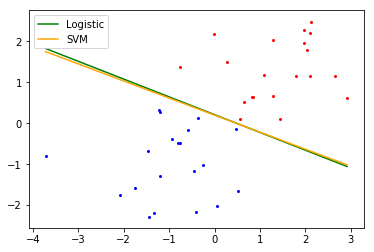

In [406]:
#chart
minval = np.min(U[:,0])
maxval = np.max(V[:,0])

line1 = np.matrix([[minval, (alpha-minval*x[0])/x[1]], [maxval, (alpha-maxval*x[0])/x[1]]])
line2 = np.matrix([[minval, (alpha2-minval*x2[0])/x2[1]], [maxval, (alpha2-maxval*x2[0])/x2[1]]])

plt.plot(line1[:,0], line1[:,1], color='green')
plt.plot(line2[:,0], line2[:,1], color='orange')
plt.scatter([U[:,0]], [U[:,1]], color='blue', marker='.', linewidth=0.01)
plt.scatter([V[:,0]], [V[:,1]], color='red', marker='.', linewidth=0.01)
plt.legend(('Logistic', 'SVM'))
plt.show()

In [407]:
#b

np.random.seed(1) # (this is for reproducibility of the results)
U_test = np.matrix(np.random.normal(-1.0, 1.0, (100,2)))
V_test = np.matrix(np.random.normal(1.0, 1.0, (100,2)))
U_test_sample = np.random.normal(-1.0, 1.0, (100,2))
V_test_sample = np.random.normal(1.0, 1.0, (100,2))

logit_positives = np.matmul(U_test,x.T)
logit_negatives = np.matmul(V_test,x.T)
svm_positives = np.matmul(U_test,x2)
svm_negatives = np.matmul(V_test,x2)

print U_test.shape, x.T.shape
logit_legit_positives = U_test_sample[logit_positives.T > alpha]
logit_false_positives = U_test_sample[logit_positives.T <= alpha]
logit_legit_negatives = V_test_sample[logit_negatives.T <= alpha]
logit_false_negatives = V_test_sample[logit_negatives.T > alpha]

svm_legit_positives = U_test_sample[svm_positives > alpha2]
svm_false_positives = U_test_sample[svm_positives <= alpha2]
svm_legit_negatives = V_test_sample[svm_negatives <= alpha2]
svm_false_negatives = V_test_sample[svm_negatives > alpha2]


print ''
print 'logistic regression test data'
print 'false positive rate: ' , float((logit_false_positives.shape[0]*1.0 / (logit_false_positives.shape[0]*1.0 + logit_legit_positives.shape[0]*1.0)) * 100)
print 'false negative rate: ', float((logit_false_negatives.shape[0]*1.0 / (logit_false_negatives.shape[0]*1.0 + logit_legit_negatives.shape[0]*1.0)) * 100)
print 'total misclassification: ', float((logit_false_positives.shape[0]*1.0 + logit_false_negatives.shape[0]*1.0) / \
                                         ((logit_legit_positives.shape[0]*1.0 + logit_legit_negatives.shape[0]*1.0) + \
                                         (logit_false_positives.shape[0]*1.0 + logit_false_negatives.shape[0]*1.0))) * 100


print ''
print 'SVM test data'
print 'false positive rate: ' , float((svm_false_positives.shape[0]*1.0 / (svm_false_positives.shape[0]*1.0 + svm_legit_positives.shape[0]*1.0)) * 100)
print 'false negative rate: ', float((svm_false_negatives.shape[0]*1.0 / (svm_false_negatives.shape[0]*1.0 + svm_legit_negatives.shape[0]*1.0)) * 100)
print 'total misclassification: ', float((svm_false_positives.shape[0]*1.0 + svm_false_negatives.shape[0]*1.0) / \
                                         ((svm_legit_positives.shape[0]*1.0 + svm_legit_negatives.shape[0]*1.0) + \
                                         (svm_false_positives.shape[0]*1.0 + svm_false_negatives.shape[0]*1.0))) * 100

(100, 2) (2,)

logistic regression test data
false positive rate:  5.0
false negative rate:  11.0
total misclassification:  8.0

SVM test data
false positive rate:  5.0
false negative rate:  11.0
total misclassification:  8.0


/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 1; dimension is 2 but corresponding boolean dimension is 1
  from ipykernel import kernelapp as app
/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:16: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 1; dimension is 2 but corresponding boolean dimension is 1
  app.launch_new_instance()
/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:17: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 1; dimension is 2 but corresponding boolean dimension is 1
/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:18: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 1; dimension is 2 but corresponding boolean dimension is 1
/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel_l

c)

both the logistic regression and the SVM produce the same misclassification rates. if we look at the below chart, we can see that the hyperplanes are practically on top of eachother, indicating similar misclassification rates.

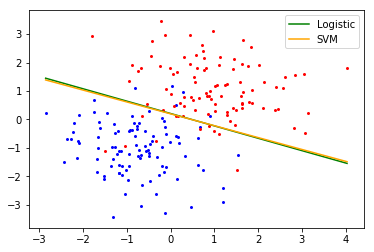

In [408]:
#chart
minval = np.min(U_test[:,0])
maxval = np.max(V_test[:,0])

line1 = np.matrix([[minval, (alpha-minval*x[0])/x[1]], [maxval, (alpha-maxval*x[0])/x[1]]])
line2 = np.matrix([[minval, (alpha2-minval*x2[0])/x2[1]], [maxval, (alpha2-maxval*x2[0])/x2[1]]])

plt.plot(line1[:,0], line1[:,1], color='green')
plt.plot(line2[:,0], line2[:,1], color='orange')
plt.scatter([U_test[:,0]], [U_test[:,1]], color='blue', marker='.', linewidth=0.01)
plt.scatter([V_test[:,0]], [V_test[:,1]], color='red', marker='.', linewidth=0.01)
plt.legend(('Logistic', 'SVM'))
plt.show()

In [409]:
#d
np.random.seed(3576759)
U = np.matrix(np.random.normal(-1.0, 1.0, (20,2)))
V = np.matrix(np.random.normal(1.0, 1.0, (20,2)))
u_ones = np.matrix(np.ones((U.shape[0],1)))
v_ones = np.matrix(np.ones((V.shape[0],1)))
A = np.concatenate((np.concatenate((-U, u_ones), axis=1), np.concatenate((V, -v_ones), axis=1)))
b = np.concatenate((-u_ones, -v_ones))
c = np.matrix(np.zeros((1,A.shape[1])))

A = np.concatenate((A, np.zeros((A.shape))))
temp = np.concatenate((np.concatenate((-np.identity(U.shape[0]), np.zeros((U.shape[0],V.shape[0]))), axis=1), 
                       np.concatenate((np.zeros((V.shape[0],U.shape[0])), -np.identity(V.shape[0])), axis=1)))
temp = np.concatenate((temp,temp))

A = np.concatenate((A, temp), axis=1)
b = np.concatenate((b, np.zeros((U.shape[0] + V.shape[0],1))))
c = np.concatenate((c, -np.ones((1,U.shape[0] + V.shape[0]))), axis=1)

print A.shape, b.shape, c.shape
x2, obj = opt111.linprog(A, b, c, A_eq=np.zeros((c.shape)), b_eq=np.zeros((1,1)), lb=None, ub=None, form='general')
alpha2 = x2[2,0]
x2 = x2[0:2,0]
print 'alpha: ', alpha2

(80, 43) (80, 1) (1, 43)
(1, 43)
Optimization terminated successfully.
alpha:  0.266575902495


In [12]:
print U_test.shape, x2.shape
lp_positives = np.matmul(U_test,x2)
lp_negatives = np.matmul(V_test,x2)

lp_legit_positives = U_test_sample[lp_positives > alpha2]
lp_false_positives = U_test_sample[lp_positives <= alpha2]
lp_legit_negatives = V_test_sample[lp_negatives <= alpha2]
lp_false_negatives = V_test_sample[lp_negatives > alpha2]

print ''
print 'linear program test data'
print 'false positive rate: ' , float((lp_false_positives.shape[0]*1.0 / (lp_false_positives.shape[0]*1.0 + lp_legit_positives.shape[0]*1.0)) * 100)
print 'false negative rate: ', float((lp_false_negatives.shape[0]*1.0 / (lp_false_negatives.shape[0]*1.0 + lp_legit_negatives.shape[0]*1.0)) * 100)
print 'total misclassification: ', float((lp_false_positives.shape[0]*1.0 + lp_false_negatives.shape[0]*1.0) / \
                                         ((lp_legit_positives.shape[0]*1.0 + lp_legit_negatives.shape[0]*1.0) + \
                                         (lp_false_positives.shape[0]*1.0 + lp_false_negatives.shape[0]*1.0))) * 100


(100, 2) (2, 1)

linear program test data
false positive rate:  11.0
false negative rate:  5.0
total misclassification:  8.0


/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 1; dimension is 2 but corresponding boolean dimension is 1
  """
/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:6: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 1; dimension is 2 but corresponding boolean dimension is 1
  
/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:7: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 1; dimension is 2 but corresponding boolean dimension is 1
  import sys
/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:8: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 1; dimension is 2 but corresponding boolean dimension is 1
  


d)

they all have the same misclassification rate.

the only difference is that the linear program has a lower false positive rate and a higher false negative rate than the logistic regression and the SVM.

see below chart:

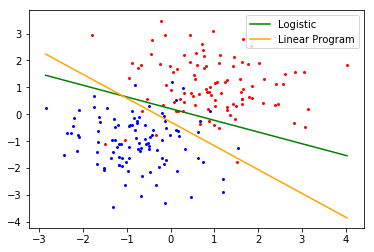

In [410]:
#chart
minval = np.min(U_test[:,0])
maxval = np.max(V_test[:,0])

line1 = np.matrix([[minval, (alpha-minval*x[0])/x[1]], [maxval, (alpha-maxval*x[0])/x[1]]])
line2 = np.matrix([[minval, (alpha2-minval*x2[0])/x2[1]], [maxval, (alpha2-maxval*x2[0])/x2[1]]])

plt.plot(line1[:,0], line1[:,1], color='green')
plt.plot(line2[:,0], line2[:,1], color='orange')
plt.scatter([U_test[:,0]], [U_test[:,1]], color='blue', marker='.', linewidth=0.01)
plt.scatter([V_test[:,0]], [V_test[:,1]], color='red', marker='.', linewidth=0.01)
plt.legend(('Logistic', 'Linear Program'))
plt.show()

## 2. Spam Filtering

In [204]:
#a

data = np.matrix(np.loadtxt('spambase.data', delimiter=","))
Y = np.array(data[:,57])
U = np.matrix(data[np.array(data[:,57] == 1)[:,0]])[:,:57]
V = np.matrix(data[np.array(data[:,57] == 0)[:,0]])[:,:57]
U_sample = data[np.array(data[:,57] == 1)[:,0]][:,:57]
V_sample = data[np.array(data[:,57] == 0)[:,0]][:,:57]

X = opt111.normalize_data(data[:,:57])[0]
C = 2
Y_onehot = opt111.convert_to_onehot(Y, C)
num_iters = 10

x, errors = opt111.logistic_regression_newtons_method(X, Y_onehot, num_iters)
y_pred = opt111.predict(X, Y_onehot, x)

In [205]:
print np.sum(Y!=y_pred), 'misclassifications'
test = Y[Y!=y_pred]
false_positives = test[test == 0]
false_negatives = test[test == 1]
print 'false positives: ', len(false_positives)
print 'false negatives: ', len(false_negatives)

316 misclassifications
false positives:  121
false negatives:  195


In [206]:
#b
U = np.matrix(data[np.array(data[:,57] == 1)[:,0]])[:,:2]
V = np.matrix(data[np.array(data[:,57] == 0)[:,0]])[:,:2]
X = opt111.normalize_data(data[:,:2])[0]
num_iters = 10

x, errors = opt111.logistic_regression_newtons_method(X, Y_onehot, num_iters)
y_pred = opt111.predict(X, Y_onehot, x)
alpha = x[0,0]
x = x[1:,0]
print np.sum(Y!=y_pred), 'misclassifications'
test = Y[Y!=y_pred]
false_positives = test[test == 0]
false_negatives = test[test == 1]
print 'false positives: ', len(false_positives)
print 'false negatives: ', len(false_negatives)

1764 misclassifications
false positives:  114
false negatives:  1650


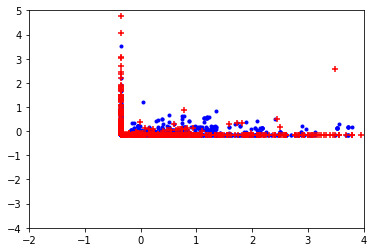

In [207]:
plt.scatter([U[:,0]], [U[:,1]], color='blue', marker='.')
plt.scatter([V[:,0]], [V[:,1]], color='red', marker='+')
plt.xlim(-2,4)
plt.ylim(-4,5)
plt.show()

In [208]:
#c
U = np.matrix(data[np.array(data[:,57] == 1)[:,0]])[:,15:17]
V = np.matrix(data[np.array(data[:,57] == 0)[:,0]])[:,15:17]
X = opt111.normalize_data(data[:,15:17])[0]
num_iters = 10

x, errors = opt111.logistic_regression_newtons_method(X, Y_onehot, num_iters)
y_pred = opt111.predict(X, Y_onehot, x)
alpha = x[0,0]
x = x[1:,0]
print np.sum(Y!=y_pred), 'misclassifications'
test = Y[Y!=y_pred]
false_positives = test[test == 0]
false_negatives = test[test == 1]
print 'false positives: ', len(false_positives)
print 'false negatives: ', len(false_negatives)
print 'alpha: ', alpha

1198 misclassifications
false positives:  204
false negatives:  994
alpha:  -0.282301442028


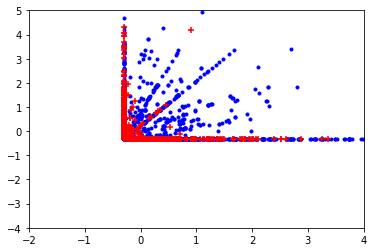

In [209]:
plt.scatter([U[:,0]], [U[:,1]], color='blue', marker='.')
plt.scatter([V[:,0]], [V[:,1]], color='red', marker='+')
plt.xlim(-2,4)
plt.ylim(-4,5)
plt.show()

d)

When we compare the plots of make/address vs. free/business, it becomes apparent that free/business datapoints are more linearly separable than make/address. We can also think of the free/business datapoints as spam intuitively by rationalizing emails containing the word "free" as likely being some nonsensical offer for free stuff, and business could be an email like "grow your business 10x using this", etc.

e)

$min \sum_{m=1}^{M} \delta_{m}^{+} + \sum_{k=1}^{K} \delta_{k}^{-}$


$-x^T u^m + \alpha + 1 \leq \delta_{m}^{+}\ \  \forall m \in 1....M$


$\delta_{m}^{+} \geq 0, \ \ \forall m \in 1....M$


$x^T v^k - \alpha + 1 \leq \delta_{k}^{-}\ \ \forall k \in 1....K$


$\delta_{k}^{-} \geq 0, \ \ \forall k \in 1....K$

In [210]:
#e
U = np.matrix(data[np.array(data[:,57] == 1)[:,0]])[:,15:17]
V = np.matrix(data[np.array(data[:,57] == 0)[:,0]])[:,15:17]
U_ones = np.matrix(np.ones(U.shape[0])).T
V_ones = np.matrix(np.ones(V.shape[0])).T

N = U.shape[1]

A = np.concatenate((np.concatenate((-U, U_ones), axis=1), np.concatenate((V, -V_ones), axis=1)))
b = np.concatenate((-U_ones,-V_ones))
print A.shape, b.shape
c = np.matrix(np.zeros(A.shape[1]))

A = np.concatenate((A, np.zeros((A.shape))))
temp = np.concatenate((np.concatenate((-np.identity(U.shape[0]), np.zeros((U.shape[0],V.shape[0]))), axis=1), 
                       np.concatenate((np.zeros((V.shape[0],U.shape[0])), -np.identity(V.shape[0])), axis=1)))
temp = np.concatenate((temp,temp))

A = np.concatenate((A, temp), axis=1)
b = np.concatenate((b, np.zeros((U.shape[0] + V.shape[0],1))))
c = np.concatenate((c, -np.ones((1,U.shape[0] + V.shape[0]))), axis=1)

print A.shape, b.shape, c.shape
x2, obj2 = opt111.linprog(A, b, c, A_eq=None, b_eq=None, lb=None, ub=None, form='general', solver='cvxopt')

(4601, 3) (4601, 1)
(9202, 4604) (9202, 1) (1, 4604)
(1, 4604)
     pcost       dcost       gap    pres   dres   k/t
 0:  1.9088e+03  1.6950e+04  1e+05  6e+00  9e+01  1e+00
 1:  1.9678e+03  1.5815e+04  1e+05  6e+00  9e+01  4e+00
 2:  2.2083e+03  1.6149e+04  1e+05  6e+00  9e+01  9e+00
 3:  2.8257e+03  9.7053e+03  4e+04  3e+00  4e+01  3e+01
 4:  2.7830e+03  4.7116e+03  6e+03  8e-01  1e+01  4e+01
 5:  2.6468e+03  3.3456e+03  2e+03  3e-01  4e+00  2e+01
 6:  2.6036e+03  2.8993e+03  7e+02  1e-01  2e+00  8e+00
 7:  2.5877e+03  2.7323e+03  3e+02  6e-02  9e-01  4e+00
 8:  2.5802e+03  2.6613e+03  2e+02  3e-02  5e-01  2e+00
 9:  2.5696e+03  2.5827e+03  3e+01  5e-03  8e-02  2e-01
10:  2.5676e+03  2.5697e+03  4e+00  8e-04  1e-02  3e-02
11:  2.5671e+03  2.5672e+03  1e-01  3e-05  4e-04  8e-04
12:  2.5671e+03  2.5671e+03  1e-03  3e-07  4e-06  8e-06
13:  2.5671e+03  2.5671e+03  1e-05  3e-09  4e-08  8e-08
Optimal solution found.


In [211]:
#e
alpha2 = x2[N,0]
x2 = x2[:N,0]
print 'alpha: ', alpha2
print 'x: ', x2

alpha:  0.189856192337
x:  [ 1.70247827  0.92501473]


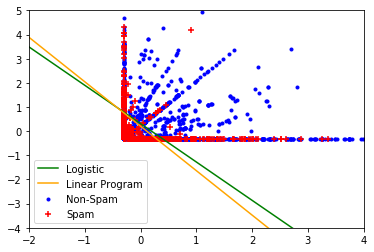

In [212]:
#f
#chart
minval = -4
maxval = 4

line1 = np.matrix([[minval, (alpha-minval*x[0])/x[1]], [maxval, (alpha-maxval*x[0])/x[1]]])
line2 = np.matrix([[minval, (alpha2-minval*x2[0])/x2[1]], [maxval, (alpha2-maxval*x2[0])/x2[1]]])

plt.plot(line1[:,0], line1[:,1], color='green')
plt.plot(line2[:,0], line2[:,1], color='orange')
plt.scatter([U[:,0]], [U[:,1]], color='blue', marker='.')
plt.scatter([V[:,0]], [V[:,1]], color='red', marker='+')
plt.legend(('Logistic', 'Linear Program','Non-Spam','Spam'))
plt.xlim(-2,4)
plt.ylim(-4,5)
plt.show()

g)

The decision boundaries are both linear, but I can't see any discernable difference in the effectiveness of the logistic regression vs. the linear program given that the data is just somewhat linearly separable, if at all.

One thing that I'll note is that the linear program seems to be more effective in determining a bound on the triangular cluster of non-spam in the corner, which indicates that it might actually be a better determinant of spam emails that contain lower percentages of free & business word use.

## 3. Iris Dataset

In [104]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
Y = np.reshape(iris.target, (X.shape[0],1))
X_orig = opt111.normalize_data(X)[0]
C = 3
Y_onehot = opt111.convert_to_onehot(Y, C)
num_iters = 50
learning_rate = 0.5

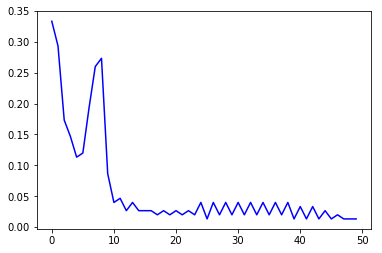

In [105]:
#a)
%matplotlib inline
x, errors = opt111.logistic_regression_gradient_descent(X_orig, Y_onehot, num_iters, learning_rate)
plt.plot(errors,color='blue')
y_pred = opt111.predict(X, Y_onehot, x)

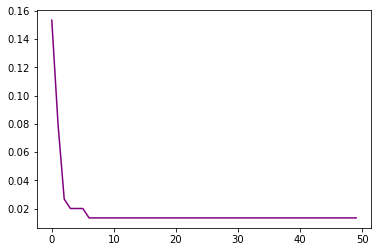

In [106]:
#b
%matplotlib inline
x2, errors2 = opt111.logistic_regression_newtons_method(X_orig, Y_onehot, num_iters)
plt.plot(errors2,color='purple')
y_pred2 = opt111.predict(X, Y_onehot, x2)

c)

Newton's method converges much faster (less than 10 iterations) than gradient descent (almost 50 iterations) in this case, as it takes the hessian (2nd deriv; accounts for velocity), and takes appropriate steps in that size; thus, it's almost a direct shot to solve for the local minima.

Gradient descent's error convergence is dependent on our step size (learning rate), and actually oscillates for a bit before finally converging, which indicates that we could be close to a minimum, in which case the descent zig zags until it finally hits the bottom (as seen in the chart).

In [107]:
#d

iris = datasets.load_iris()
X = iris.data
Y = np.reshape(iris.target, (X.shape[0],1))
_,X_test = opt111.normalize_data(X, X_test=np.matrix("5.5, 3.7, 1.4, 0.3"))
C = 3

J, N = X_test.shape
beta_matrix = np.reshape(x2, ((C-1), (N+1)))
X_tmp = np.concatenate((-np.ones((J, 1)), X_test), axis=1)

P_matrix = np.zeros(((C-1), J))
beta_matrix_conc = np.concatenate((np.zeros((1,N+1)),beta_matrix), axis=0)
exponent = np.sum(np.multiply(beta_matrix_conc, X_tmp[0,:]), axis=1)
a = np.amax(exponent)
denominator_log = a + np.log(np.sum(np.exp(exponent-a), axis=0))
numerator_log = np.sum(np.multiply(beta_matrix, X_tmp[0,:]), axis=1)
tmp_log = numerator_log - denominator_log
P_matrix = np.exp(tmp_log)

probs = P_matrix.T
last_clmn = np.ones((J,1))-np.sum(probs)
probs = np.concatenate((probs, last_clmn), axis=1)

print probs[0,0]*100.0, ' percent chance of being Setosa'
print ''
print probs[0,1]*100.0, ' percent chance of being Versicolour'
print ''
print probs[0,2]*100.0, ' percent chance of being Virginica'

100.0  percent chance of being Setosa

3.85147821176e-20  percent chance of being Versicolour

0.0  percent chance of being Virginica


In [109]:
#d - assuming 0 setosa probability
new_probs= []
new_probs.append(probs[0,1]/(probs[0,1]+probs[0,2]))
new_probs.append(probs[0,2]/(probs[0,1]+probs[0,2]))
print new_probs[0]*100.0, ' percent chance of being Versicolour'
print ''
print new_probs[1]*100.0, ' percent chance of being Virginica'

100.0  percent chance of being Versicolour

0.0  percent chance of being Virginica
